# Unicorn Data Analysis Project

Welcome to the **Unicorn Data Analysis** project! In this notebook, I will be using Python and its libraries to analyze unicorn startups — companies with valuations exceeding one billion dollars.

This analysis aims to uncover key insights about unicorns, including their growth timelines, funding patterns, and origins.

---

## Introduction to Unicorn Startups

Startups valued at over a billion dollars are referred to as "unicorns" due to their rarity and high value. Through this analysis, we will explore patterns among unicorn startups to better understand their origins, timelines, and valuations.

---

## Key Questions for Analysis

This project will address the following questions:

1. **Timeline of Founding**  
   - At what points in time were most unicorn startups founded?

2. **Time to Unicorn Status**  
   - How long did it take for companies to achieve unicorn status after being founded?

3. **Top Funders**  
   - Which companies have funded the highest number of unicorn startups?

4. **Unicorn Status Timeline**  
   - What timeline did most companies follow to achieve unicorn status?

5. **Geographic Origins**  
   - From which countries or regions have these unicorn companies originated?

6. **Largest Valuations**  
   - Which startups have the largest valuations?

7. **Recent Unicorns**  
   - Which companies have recently achieved unicorn status?

---

### Objective

By analyzing these questions, this project will provide a comprehensive overview of unicorn startups and highlight trends within the current unicorn landscape.

---

Let's begin exploring the unicorn data to uncover valuable insights!


In [6]:
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [7]:
# Define the file path
file_path = '/Users/nithinreddyvangala/Documents/Projects/Python - Data Analytics :ML Project /Unicorn Data Analysis /unicorn_companies.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    unicorn = pd.read_csv(file_path)
    print('File has been loaded Successfully')
else:
    print('Said File is not present at the Specified Path')

File has been loaded Successfully


## Understanding "Unicorn" Dataset 

In [8]:
#Reading the File
unicorn.head()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,$140.00,4/7/17,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.30,12/1/12,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95.00,1/23/14,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.60,12/12/11,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40.00,1/8/18,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [9]:
# Finding the Dataset length - to evaluate how many columns we have in the dataset
print("Lenght of the Dataset: ", len(unicorn))

print("\n")

#Reading Columns 
print("Column Names:", unicorn.columns.tolist()) 

print("\n")

#Finding data info like what are the Dtypes of each column and how many values are present in each column

#Understanding Column datatypes of each columns and presence of total Values in the Dataset columns
print("Column Datatypes:", unicorn.info())

Lenght of the Dataset:  917


Column Names: ['Company', 'Valuation ($B) ', 'Date Added', 'Country', 'Category', 'Select Investors']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           917 non-null    object
 1   Valuation ($B)    917 non-null    object
 2   Date Added        917 non-null    object
 3   Country           917 non-null    object
 4   Category          917 non-null    object
 5   Select Investors  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB
Column Datatypes: None


## Dataset Overview

Our dataset consists of **917 rows** of data, with each row containing the following **6 fields**:
- **'Company'**: The name of the company.
- **'Valuation ($B)'**: The company's valuation in billion dollars.
- **'Date Added'**: The date the company received its Unicorn status.
- **'Country'**: The country the startup is from.
- **'Category'**: The area or sector the company is focusing on.
- **'Select Investors'**: The investors who have invested in the company.

Each row represents a company with the above information. Notably, we have only **1 company** in the dataset that does not have information about its investors.


## Analysing the Dataset 

### Companies with the Highest Valuation


In [10]:
# Converting the datatype of 'Valuation ($B)' from object to numeric

# Ensure the column is treated as string type before replacing characters
unicorn['Valuation ($B) '] = unicorn['Valuation ($B) '].astype(str)

# Stripping the column of any non-numeric characters before converting the datatype
unicorn['Valuation ($B) '] = unicorn['Valuation ($B) '].str.replace(r'[^0-9.]', '', regex=True)

# Converting the datatype to numeric, keeping the conversion in the same column
unicorn['Valuation ($B) '] = pd.to_numeric(unicorn['Valuation ($B) '], errors='coerce')

# Sorting the companies based on Valuation 
# Print the companies with the highest valuations as of the dataset published
print(unicorn.sort_values(by='Valuation ($B) ', ascending=False).head(7))


      Company  Valuation ($B)  Date Added        Country  \
0   Bytedance            140.0     4/7/17          China   
1      SpaceX            100.3    12/1/12  United States   
2      Stripe             95.0    1/23/14  United States   
3      Klarna             45.6   12/12/11         Sweden   
4       Canva             40.0     1/8/18      Australia   
5   Instacart             39.0   12/30/14  United States   
6  Databricks             38.0     2/5/19  United States   

                              Category  \
0              Artificial intelligence   
1                                Other   
2                              Fintech   
3                              Fintech   
4         Internet software & services   
5  Supply chain, logistics, & delivery   
6          Data management & analytics   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2        Khosla V

### Top 7 companies to receive their earliest Unicorn status

In [11]:
#Converting the datatype of Valuation ($B) from object to numeric

# Ensure the column is treated as string type before replacing characters
unicorn['Date Added'] = unicorn['Date Added'].astype(str)

#converting the Datatype tp numeric
unicorn['Date Added'] = pd.to_datetime(unicorn['Date Added'])

#Sorting the Companies based on date they have reached Unicorn Status
#print the companies based on date they have reached Unicorn Status

earliest = unicorn[['Company', 'Date Added', 'Valuation ($B) ', 'Category']].sort_values(by='Date Added', ascending=True).head(7)

print(earliest.head(7))

                        Company Date Added  Valuation ($B)   \
555                      Veepee 2007-07-20             1.38   
222                       VANCL 2010-12-14             3.00   
99                   Vice Media 2011-04-02             5.70   
3                        Klarna 2011-12-12            45.60   
344  Trendy Group International 2012-02-13             2.00   
14                     Fanatics 2012-06-06            18.00   
1                        SpaceX 2012-12-01           100.30   

                            Category  
555  E-commerce & direct-to-consumer  
222  E-commerce & direct-to-consumer  
99      Internet software & services  
3                            Fintech  
344                Consumer & retail  
14   E-commerce & direct-to-consumer  
1                              Other  


### Companies which have received their Unicorn status in the last 3 years

In [12]:
#Latest 7 Companies to receive their unicorn status 
print(unicorn[['Company','Date Added', 'Valuation ($B) ']].tail(7))

               Company Date Added  Valuation ($B) 
910  Gaussian Robotics 2021-11-10              1.0
911       Mensa Brands 2021-11-16              1.0
912             Heyday 2021-11-16              1.0
913              PLACE 2021-11-17              1.0
914             Stytch 2021-11-18              1.0
915              Owkin 2021-11-18              1.0
916              Expel 2021-11-18              1.0


In [13]:
#Companies which have received their unicorn status in the last 3 years

#based on date
#recent_unicorns = unicorn[unicorn['Date Added'] >= (datetime.now() - timedelta(days=3*365))]

#based on year
recent_unicorns = unicorn[unicorn['Date Added'].dt.year >= (datetime.now().year - 3)]

print('From the total dataset of unicorn companies, we have', recent_unicorns['Company'].nunique(), 'Companies which have recieved their unicorn starts in the last 3 years')

print(recent_unicorns[['Company', 'Date Added', 'Valuation ($B) ']])

From the total dataset of unicorn companies, we have 457 Companies which have recieved their unicorn starts in the last 3 years
                    Company Date Added  Valuation ($B) 
11                      FTX 2021-07-20            25.00
31                 GoodLeap 2021-10-13            12.00
32        ZongMu Technology 2021-06-03            11.40
35                  Weilong 2021-05-08            10.88
44   Digital Currency Group 2021-11-01            10.00
..                      ...        ...              ...
912                  Heyday 2021-11-16             1.00
913                   PLACE 2021-11-17             1.00
914                  Stytch 2021-11-18             1.00
915                   Owkin 2021-11-18             1.00
916                   Expel 2021-11-18             1.00

[457 rows x 3 columns]


From this Analysis we can say that half of the companies in our dataset have recieved their Unicorn status in 2last three years. Since this dataset is has information of Unicorn companies till 2021. 457 out of the 917 companies dat we have, received their status in the of an year i.e., 2021. Looks like 2021 is the year. Did some other factors like pandemic has ecouraged investments into startups. 

### Companies with Similar names

In [14]:
#Finding Companies with Unique name
print('Strange but do any companies have the same name in our dataset')
print('We know that their are', len(unicorn) ,'rows of data, let see How many are unique:', unicorn['Company'].nunique())

Strange but do any companies have the same name in our dataset
We know that their are 917 rows of data, let see How many are unique: 916


In [15]:
#Form the 917 Unicorn Companies, One name is not so unique

#Finding the company name which is not unique based value count
unicorn['Company'].value_counts().head(5)

print(unicorn['Company'].value_counts().head(5))



Bolt           2
Bytedance      1
Pipa Coding    1
Yiguo          1
Fair           1
Name: Company, dtype: int64


In [16]:
#Finding out if the data is repeated or if the unicorns are indeed different entities
print(unicorn[unicorn['Company']=='Bolt'])

    Company  Valuation ($B)  Date Added        Country               Category  \
94     Bolt             6.00 2021-10-08  United States                Fintech   
126    Bolt             4.75 2018-05-29        Estonia  Auto & transportation   

                                      Select Investors  
94   Activant Capital, Tribe Capital, General Atlantic  
126             Didi Chuxing, Diamler, TMT Investments  


### Which Countries have the most number of Unicorns

In [17]:
# Top 7 Countries with the most Unicorns
unicorn_country_count = unicorn['Country'].value_counts()

print(unicorn_country_count.head(7))

United States     469
China             169
India              48
United Kingdom     34
Germany            22
Israel             20
France             19
Name: Country, dtype: int64


### In which category do we have the most number of unicorns

In [18]:
#finding out the number of unique ca

categories_df = pd.DataFrame(unicorn['Category'].unique(), columns=['Category'])

# Display the DataFrame
print(categories_df)

                               Category
0               Artificial intelligence
1                                 Other
2                               Fintech
3          Internet software & services
4   Supply chain, logistics, & delivery
5           Data management & analytics
6                                Edtech
7       E-commerce & direct-to-consumer
8                              Hardware
9                 Auto & transportation
10                               Health
11                    Consumer & retail
12                             Finttech
13                               Travel
14                        Cybersecurity
15          Mobile & telecommunications
16              Artificial Intelligence


In [19]:
# Top 7 Countries with the most Unicorns
unicorn_category_count = unicorn['Category'].value_counts().reset_index()

unicorn_category_count.columns= ['Category', 'Investment_Count']

print(unicorn_category_count)

                               Category  Investment_Count
0                               Fintech               184
1          Internet software & services               164
2       E-commerce & direct-to-consumer                97
3               Artificial intelligence                69
4                                Health                62
5   Supply chain, logistics, & delivery                51
6                                 Other                51
7                         Cybersecurity                38
8           Mobile & telecommunications                36
9           Data management & analytics                35
10                             Hardware                32
11                Auto & transportation                30
12                               Edtech                27
13                    Consumer & retail                23
14                               Travel                14
15              Artificial Intelligence                 3
16            

### Who have invested in most companies and sectors they have invested in


With investors willing to invest millions of dollars into an idea they think will revolutionize the way we live is how a startup achieve its unicorn status. So before going public most companies go looking for investors who they will be ready to bet on them. There are some companies which are big on investing into startup with hopes the will turn their millions into billions. After all investor also need these start up to make money. So when a start up needs funding to improve or scale their business they reach out to investors through Funding Rounds - there are multiple rounds (Series A, B and C)- probably outof-scopr for this project and you can google them yourseleves. BAsed the startup revenue, user growth and market potentinal these investor invest in these start-up Companies. Now Let see which are major funding insitutions have invested in most companies and what sector they are investing in.

In [20]:
# Split the 'Select Investors' column by commas
unicorn['Select Investors'] = unicorn['Select Investors'].str.strip()
unicorn['Select Investors'] = unicorn['Select Investors'].str.split(',')

In [21]:
# Explode the 'Select Investors' column to separate each investor into its own row
unicorn_exploded = unicorn.explode('Select Investors')
unicorn_exploded['Select Investors'] = unicorn_exploded['Select Investors'].str.strip()

# Display the first few rows of the exploded DataFrame
unicorn_exploded.head(10)

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Sequoia Capital China
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,SIG Asia Investments
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Sina Weibo
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Other,Founders Fund
1,SpaceX,100.3,2012-12-01,United States,Other,Draper Fisher Jurvetson
1,SpaceX,100.3,2012-12-01,United States,Other,Rothenberg Ventures
2,Stripe,95.0,2014-01-23,United States,Fintech,Khosla Ventures
2,Stripe,95.0,2014-01-23,United States,Fintech,LowercaseCapital
2,Stripe,95.0,2014-01-23,United States,Fintech,capitalG


In [22]:
#Total Unicorns the Investors have invested in
investor_count = unicorn_exploded['Select Investors'].value_counts()

# Convert the series into a DataFrame
investor_count = investor_count.reset_index()

# Rename columns for clarity
investor_count.columns = ['Select Investors','Invested in']

# Display the new DataFrame
print(investor_count.head(20)) 

                    Select Investors  Invested in
0                              Accel           49
1              Sequoia Capital China           47
2            Tiger Global Management           41
3                    Sequoia Capital           40
4                   Insight Partners           38
5                Andreessen Horowitz           38
6                     SoftBank Group           28
7                     Index Ventures           27
8        Lightspeed Venture Partners           26
9                   General Atlantic           25
10                  Tencent Holdings           25
11                  General Catalyst           24
12                       IDG Capital           23
13                   Google Ventures           23
14         New Enterprise Associates           22
15             Sequoia Capital India           21
16  Kleiner Perkins Caufield & Byers           20
17         Bessemer Venture Partners           18
18                        DST Global           18


Since Accel is the major investor lets see what they Companies they have invested in

In [23]:
unicorn_exploded[unicorn_exploded['Select Investors']=='Accel']

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
20,goPuff,15.00,2020-10-08,United States,E-commerce & direct-to-consumer,Accel
34,Celonis,11.00,2018-06-26,Germany,Data management & analytics,Accel
50,Klaviyo,9.20,2020-11-17,United States,Internet software & services,Accel
58,Snyk,8.60,2020-01-21,United Kingdom,Cybersecurity,Accel
65,Hopin,7.75,2020-11-10,United Kingdom,Internet software & services,Accel
67,Netskope,7.50,2018-11-13,United States,Cybersecurity,Accel
71,Scale AI,7.30,2019-08-05,United States,Artificial intelligence,Accel
124,ZEPZ,5.00,2021-08-23,United Kingdom,Fintech,Accel
129,Checkr,4.60,2019-09-19,United States,Internet software & services,Accel
134,Vinted,4.53,2019-11-27,Lithuania,E-commerce & direct-to-consumer,Accel


In [24]:
#Categoy based investments for the Accel investors

# Filtering for rows where the Investor is 'Accel'
Accel_Invested = unicorn_exploded[unicorn_exploded['Select Investors']=='Accel']

# Group by category and count the occurrences
Accel_invested_count = Accel_Invested['Category'].value_counts().reset_index()

# Rename columns for clarity
Accel_invested_count.columns = ['Category', 'Investment_Count']

print("Categories Accel has invested in:")
print(Accel_invested_count)

Categories Accel has invested in:
                               Category  Investment_Count
0          Internet software & services                13
1                               Fintech                10
2       E-commerce & direct-to-consumer                 9
3                         Cybersecurity                 4
4                                Health                 3
5           Data management & analytics                 2
6                                Edtech                 2
7                                 Other                 2
8   Supply chain, logistics, & delivery                 2
9               Artificial intelligence                 1
10          Mobile & telecommunications                 1


## Visualizing Anaylzed Data Thorugh Seaborn and matplotlib



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Category')

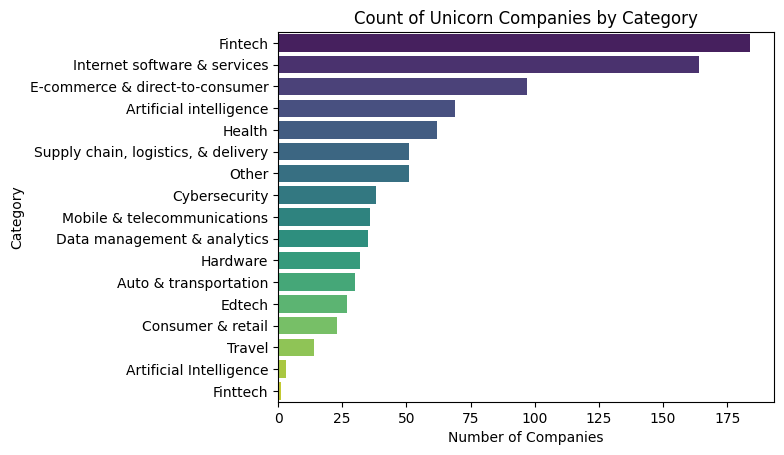

In [26]:
#Catgeory Segmentation of Unicorns
sns.countplot(y='Category', data=unicorn, order = unicorn['Category'].value_counts().index, palette='viridis') 
plt.title('Count of Unicorn Companies by Category')
plt.xlabel('Number of Companies')
plt.ylabel('Category')

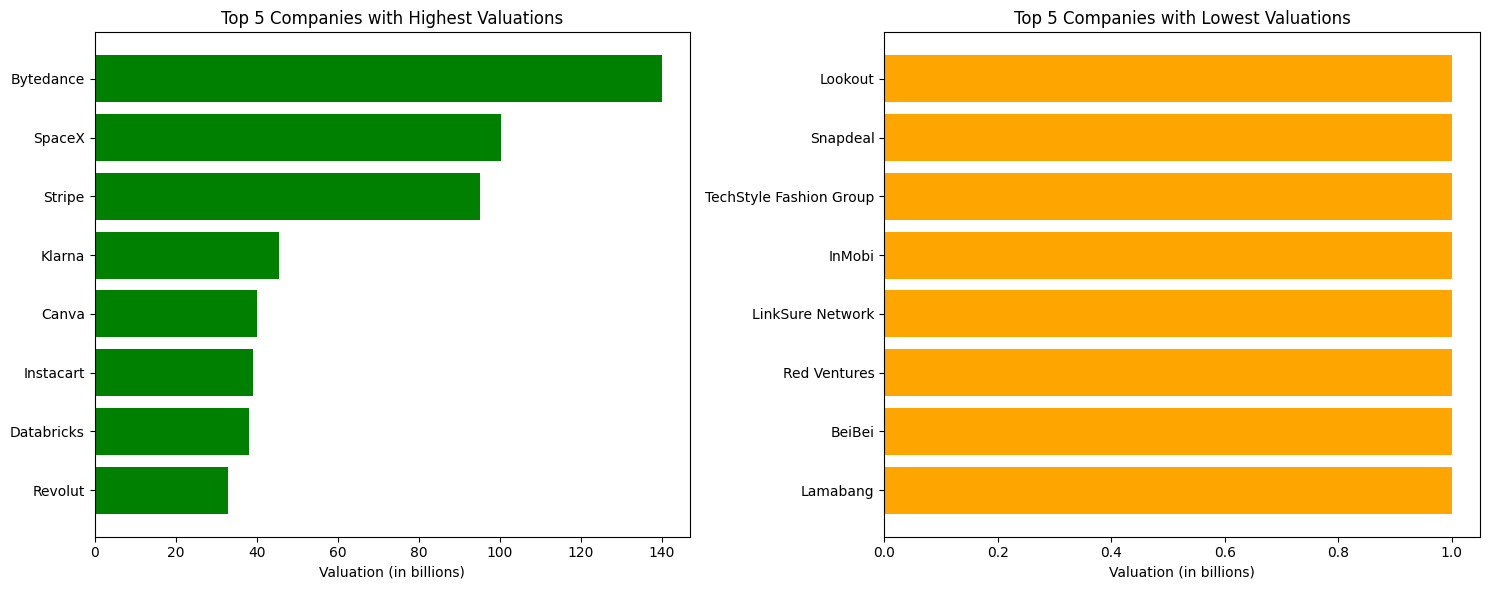

In [27]:
# Find the top 5 companies with the highest and lowest valuations
top_valued_companies = unicorn.nlargest(8, 'Valuation ($B) ')
least_valued_companies = unicorn.nsmallest(8, 'Valuation ($B) ')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for highest valuations
axes[0].barh(top_valued_companies['Company'], top_valued_companies['Valuation ($B) '], color='green')
axes[0].set_title('Top 5 Companies with Highest Valuations')
axes[0].set_xlabel('Valuation (in billions)')
axes[0].invert_yaxis()  # Invert y-axis for better readability

# Plot for lowest valuations
axes[1].barh(least_valued_companies['Company'], least_valued_companies['Valuation ($B) '], color='orange')
axes[1].set_title('Top 5 Companies with Lowest Valuations')
axes[1].set_xlabel('Valuation (in billions)')
axes[1].invert_yaxis()

# Show the plots
plt.tight_layout()
plt.show()

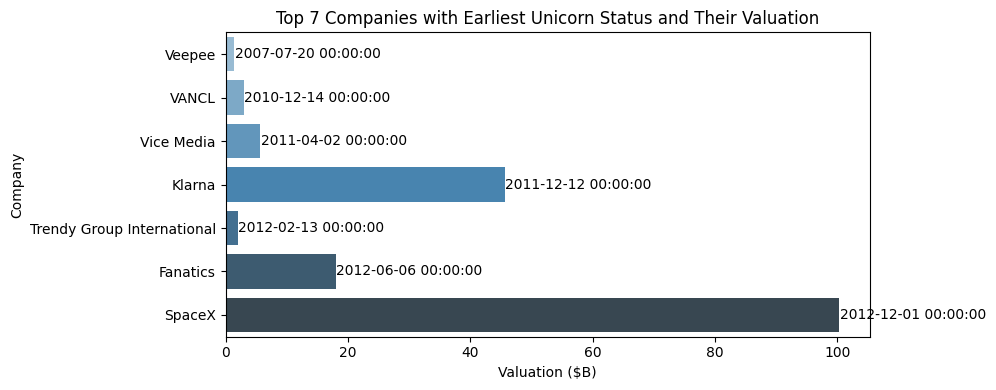

In [28]:
##'Top 7 Companies with Earliest Unicorn Status and Their Valuation' -- Sorted by earliest date

# Plot a bar plot using Seaborn
plt.figure(figsize=(10, 4))

# Create a bar plot with Seaborn, using 'Company' for the x-axis and 'Valuation ($B) ' for the y-axis
sns.barplot(x='Valuation ($B) ', y='Company', data=earliest, palette='Blues_d')

# Add titles and labels for clarity
plt.title('Top 7 Companies with Earliest Unicorn Status and Their Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Company')


# Annotate the bars with the 'Date Added' values
for i, v in enumerate(earliest['Valuation ($B) ']):
    plt.text(v + 0.1, i, f'{earliest["Date Added"].iloc[i]}', color='black', ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Country')

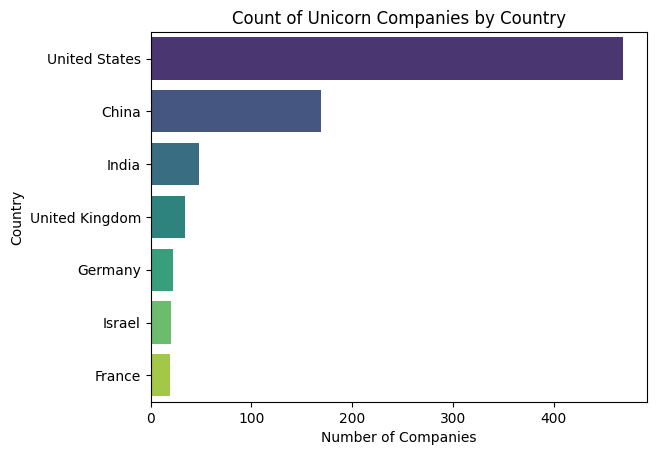

In [29]:
#Countries with a highest Unicorns
#Catgeory Segmentation of Unicorns
sns.countplot(y='Country', data=unicorn, order = unicorn['Country'].value_counts().head(7).index, palette='viridis') 
plt.title('Count of Unicorn Companies by Country')
plt.xlabel('Number of Companies')
plt.ylabel('Country')

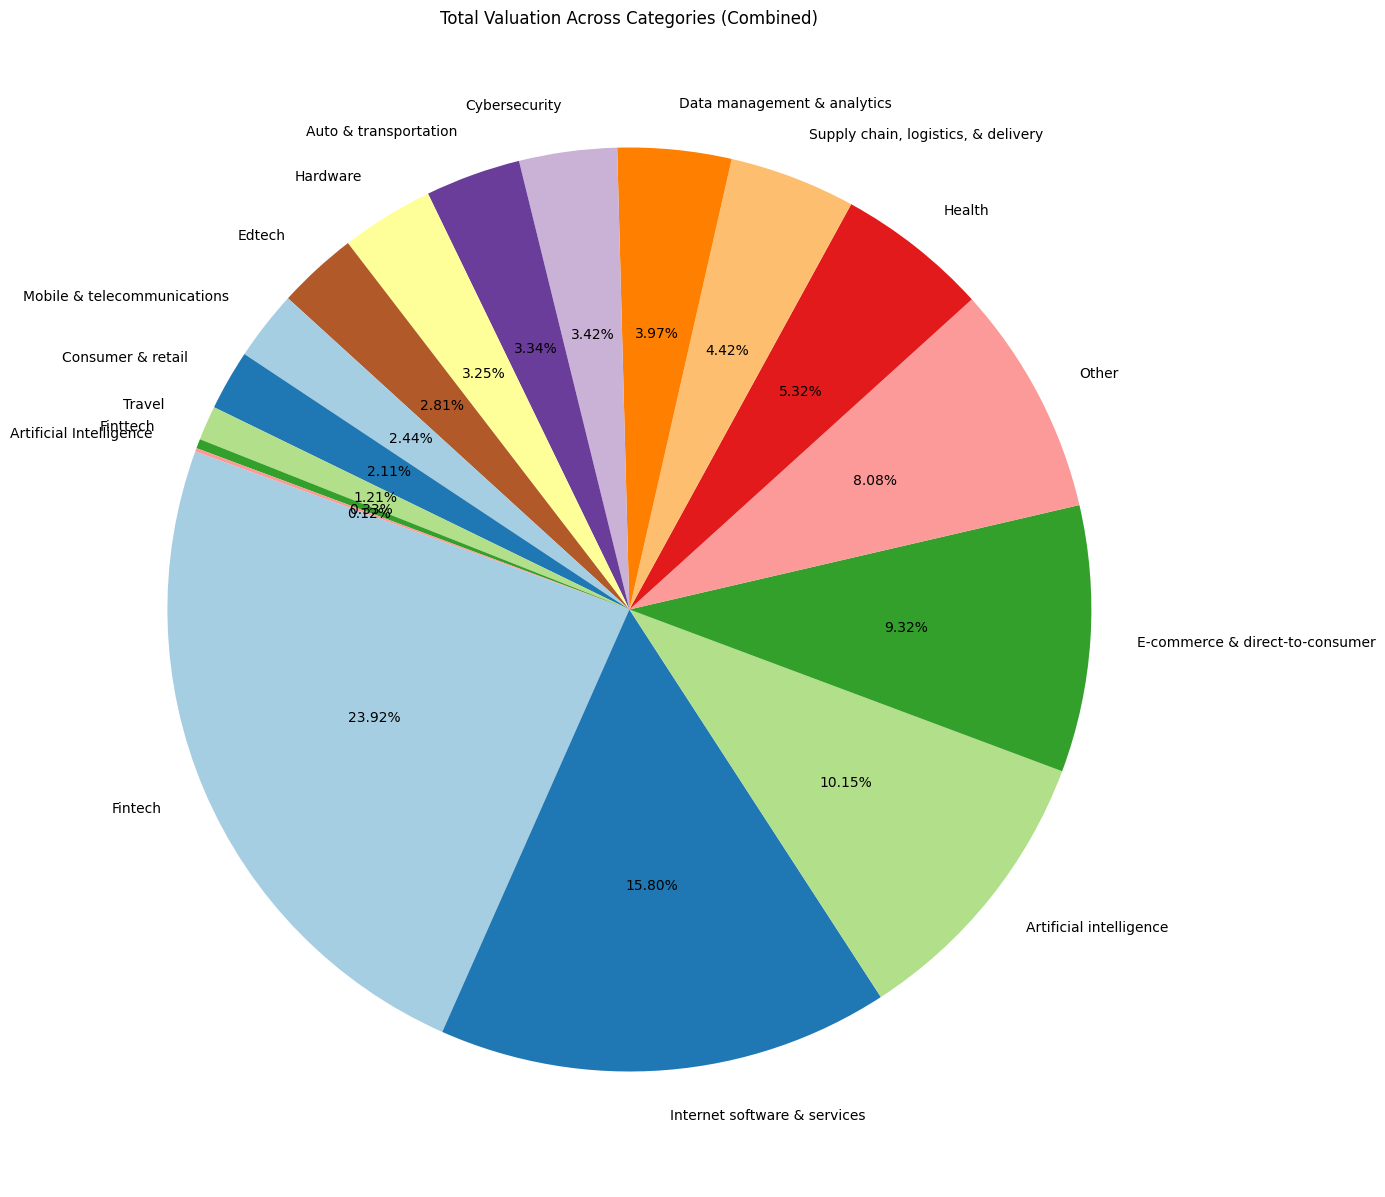

In [30]:
#Valuation accross Categories Combined

# Group by 'Category' and sum the 'Valuation ($B) ' for each category
valuation_by_category = unicorn.groupby('Category')['Valuation ($B) '].sum().sort_values(ascending = False)


#Plotting the pie chart
plt.figure(figsize = (15,15))
plt.pie(valuation_by_category, labels = valuation_by_category.index, autopct = '%2.2f%%', startangle = 160,colors=plt.cm.Paired.colors)

# Adding title
plt.title('Total Valuation Across Categories (Combined)')

#the plot
plt.show()

